# ONLINE SHOPPING ANALYSIS

## INTRODUCTION

### Online shopping has become an integral part of modern consumer behavior, transforming the retail landscape by providing a convenient and accessible way for individuals to purchase goods and services over the internet. The shift towards online shopping has been driven by various factors, including the ease of browsing through a wide range of products, the convenience of making purchases from anywhere, and the availability of diverse payment options.Understanding the dynamics of online shopping is crucial for businesses, marketers, and policymakers. Analyzing the data generated from online transactions provides valuable insights that can inform strategic decision-making. 

## Import all necessary libaries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df=pd.read_csv(r"C:\Users\COMFORT\OneDrive\Desktop\Online Shopping Dataset.csv")

In [54]:
df

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,1/1/2019,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,1/1/2019,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52950,52950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gift Cards,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,GC20,20.0
52951,52951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notebooks & Journals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NJ20,20.0
52952,52952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,AND10,10.0
52953,52953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,AND20,20.0


In [55]:
# Drop the unnamed column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Now 'df' contains the dataset without the unnamed column

In [56]:
df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,17850.0,M,Chicago,12.0,16680.0,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,17850.0,M,Chicago,12.0,16696.0,1/1/2019,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,17850.0,M,Chicago,12.0,16699.0,1/1/2019,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,17850.0,M,Chicago,12.0,16700.0,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [57]:
df.tail()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
52950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gift Cards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,GC20,20.0
52951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notebooks & Journals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NJ20,20.0
52952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,AND10,10.0
52953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,AND20,20.0
52954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,AND30,30.0


In [58]:
df.sample()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
6725,18198.0,F,Chicago,29.0,46395.0,12/11/2019,GGOEGAEH090616,Google Tee Green,Apparel,1.0,17.93,6.5,Used,0.18,12/11/2019,4000.0,1612.93,12,SALE30,30.0


In [59]:
df.isnull().sum()

CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Transaction_ID          31
Transaction_Date        31
Product_SKU             31
Product_Description     31
Product_Category         0
Quantity                31
Avg_Price               31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64

In [60]:
# Assuming your DataFrame is named 'df'
df = df.drop(columns=['Coupon_Code', 'Discount_pct'])

In [61]:
# Assuming your DataFrame is named 'df'
df['Product_Category'].fillna(df['Product_Category'].mode()[0], inplace=True)
df['Month'].fillna(df['Month'].mode()[0], inplace=True)

In [62]:
# Assuming your DataFrame is named 'df'
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Location'].fillna(df['Location'].mode()[0], inplace=True)

# Fill numerical columns with mean or median
df['Quantity'].fillna(df['Quantity'].median(), inplace=True)
df['Avg_Price'].fillna(df['Avg_Price'].mean(), inplace=True)
df['Delivery_Charges'].fillna(df['Delivery_Charges'].mean(), inplace=True)
df['Online_Spend'].fillna(df['Online_Spend'].mean(), inplace=True)
df['Offline_Spend'].fillna(df['Offline_Spend'].mean(), inplace=True)

In [63]:
df.tail()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month
52950,NaN,F,Chicago,NaN,NaN,NaN,NaN,NaN,Gift Cards,1.0,52.237646,10.51763,NaN,NaN,NaN,2830.914141,1893.109119,11
52951,NaN,F,Chicago,NaN,NaN,NaN,NaN,NaN,Notebooks & Journals,1.0,52.237646,10.51763,NaN,NaN,NaN,2830.914141,1893.109119,11
52952,NaN,F,Chicago,NaN,NaN,NaN,NaN,NaN,Android,1.0,52.237646,10.51763,NaN,NaN,NaN,2830.914141,1893.109119,10
52953,NaN,F,Chicago,NaN,NaN,NaN,NaN,NaN,Android,1.0,52.237646,10.51763,NaN,NaN,NaN,2830.914141,1893.109119,11
52954,NaN,F,Chicago,NaN,NaN,NaN,NaN,NaN,Android,1.0,52.237646,10.51763,NaN,NaN,NaN,2830.914141,1893.109119,12


In [64]:
df = df.dropna()

In [65]:
df.tail()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month
52919,13155.0,F,California,8.0,22504.0,3/10/2019,GGOEGGCX056399,Gift Card - $250.00,Gift Cards,1.0,250.00,0.0,Clicked,0.05,3/10/2019,2500.0,1294.22,3
52920,18077.0,M,Chicago,34.0,24250.0,3/28/2019,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1.0,25.00,0.0,Used,0.05,3/28/2019,2000.0,1066.12,3
52921,16085.0,M,California,15.0,39991.0,10/6/2019,GGOEGOCD078399,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,6.0,Clicked,0.05,10/6/2019,3000.0,2230.76,10
52922,16085.0,M,California,15.0,39991.0,10/6/2019,GGOEGOCR078499,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,6.0,Used,0.05,10/6/2019,3000.0,2230.76,10
52923,13659.0,F,Chicago,8.0,39998.0,10/6/2019,GGOEGOCC077999,Google Spiral Journal with Pen,Notebooks & Journals,1.0,5.59,6.5,Not Used,0.05,10/6/2019,3000.0,2230.76,10


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52924 entries, 0 to 52923
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  float64
 1   Gender               52924 non-null  object 
 2   Location             52924 non-null  object 
 3   Tenure_Months        52924 non-null  float64
 4   Transaction_ID       52924 non-null  float64
 5   Transaction_Date     52924 non-null  object 
 6   Product_SKU          52924 non-null  object 
 7   Product_Description  52924 non-null  object 
 8   Product_Category     52924 non-null  object 
 9   Quantity             52924 non-null  float64
 10  Avg_Price            52924 non-null  float64
 11  Delivery_Charges     52924 non-null  float64
 12  Coupon_Status        52924 non-null  object 
 13  GST                  52924 non-null  float64
 14  Date                 52924 non-null  object 
 15  Offline_Spend        52924 non-null  floa

In [67]:
df.describe()

,CustomerID,Tenure_Months,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month
count,52924.00000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000
mean,15346.70981,26.127995,32409.825675,4.497638,52.237646,10.517630,0.137462,2830.914141,1893.109119,6.652388
std,1766.55602,13.478285,8648.668977,20.104711,64.006882,19.475613,0.045825,936.154247,807.014092,3.333364
min,12346.00000,2.000000,16679.000000,1.000000,0.390000,0.000000,0.050000,500.000000,320.250000,1.000000
25%,13869.00000,15.000000,25384.000000,1.000000,5.700000,6.000000,0.100000,2500.000000,1252.630000,4.000000
50%,15311.00000,27.000000,32625.500000,1.000000,16.990000,6.000000,0.180000,3000.000000,1837.870000,7.000000
75%,16996.25000,37.000000,39126.250000,2.000000,102.130000,6.500000,0.180000,3500.000000,2425.350000,9.000000
max,18283.00000,50.000000,48497.000000,900.000000,355.740000,521.360000,0.180000,5000.000000,4556.930000,12.000000


# Customer Demographics

## 1: What is the distribution of customers based on gender?

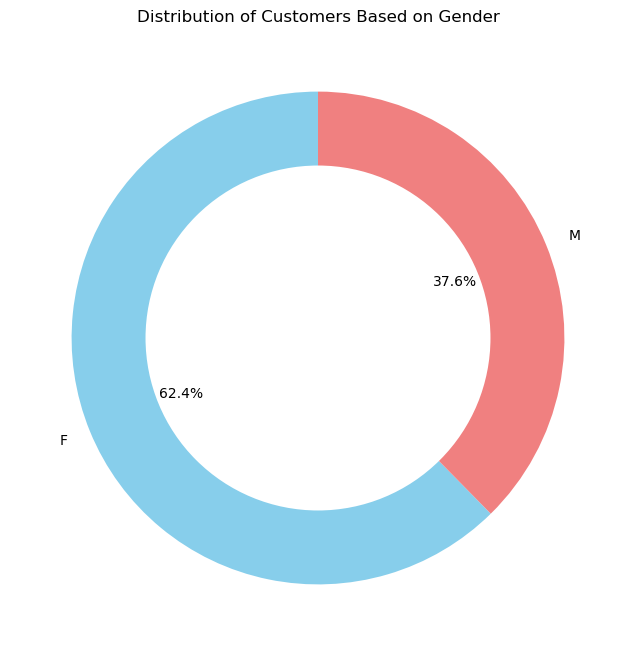

In [68]:
# Assuming your DataFrame is named 'df'
gender_distribution = df['Gender'].value_counts()

# Create a doughnut chart
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))  # Draw a white circle to create a doughnut chart

plt.title('Distribution of Customers Based on Gender')
plt.show()

## Base on the Gender, there are more female customers with 62.4% than the male customers with 37.6%

## 2: How is the location (Chicago in this case) impacting the number of transactions or spending?

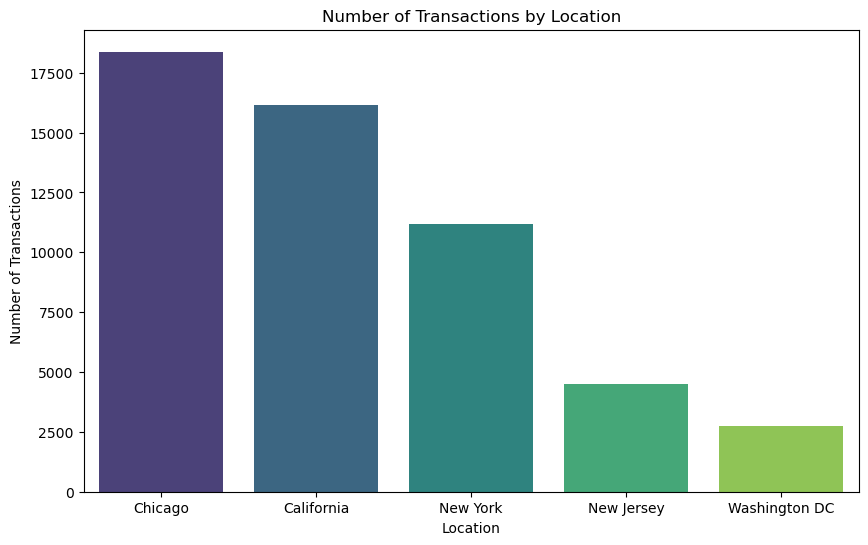

In [69]:
# Assuming your DataFrame is named 'df'
plt.figure(figsize=(10, 6))

# Using seaborn for a stylish plot
sns.countplot(x='Location', data=df, palette='viridis')

# Matplotlib version without seaborn
# plt.bar(df['Location'].value_counts().index, df['Location'].value_counts(), color='skyblue')

plt.title('Number of Transactions by Location')
plt.xlabel('Location')
plt.ylabel('Number of Transactions')
plt.show()

## Base on the transactions and spending, Chicago has the most number of transaction.

## 3: What is the distribution of offline spending, and how does it compare to online spending?

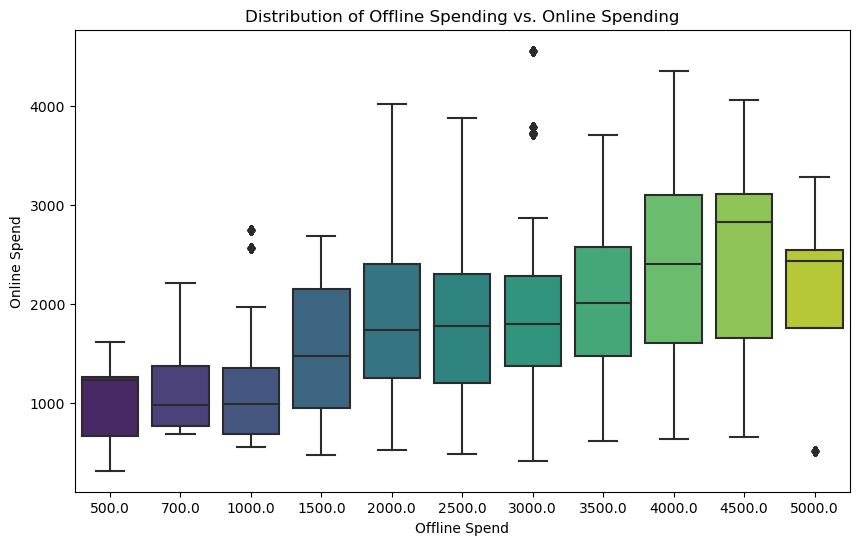

In [70]:
# Assuming your DataFrame is named 'df'
plt.figure(figsize=(10, 6))

# Using seaborn for a box plot
sns.boxplot(x='Offline_Spend', y='Online_Spend', data=df, palette='viridis')

plt.title('Distribution of Offline Spending vs. Online Spending')
plt.xlabel('Offline Spend')
plt.ylabel('Online Spend')
plt.show()

## In the distribution of spending, Online spending has more distribution with more than 3000 spends, while offline spending has less than 3000 spends.

# Product Analysis

## 1:What are the top-selling products in terms of quantity and revenue?

In [71]:
# Top-selling products in terms of quantity
top_products_quantity = df.groupby('Product_Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Top-selling products in terms of revenue
top_products_revenue = df.groupby('Product_Description')['Online_Spend'].sum().sort_values(ascending=False).head(10)

print("Top-selling products in terms of quantity:")
print(top_products_quantity)

print("\nTop-selling products in terms of revenue:")
print(top_products_revenue)

Top-selling products in terms of quantity:
Product_Description
Maze Pen                                  16234.0
Google 22 oz Water Bottle                 14282.0
Google Sunglasses                         11452.0
Sport Bag                                  7321.0
Google Metallic Notebook Set               6496.0
Google Laptop and Cell Phone Stickers      5847.0
Google Kick Ball                           5549.0
Recycled Paper Journal Set                 5381.0
Nest Cam Outdoor Security Camera - USA     5206.0
Foam Can and Bottle Cooler                 5098.0
Name: Quantity, dtype: float64

Top-selling products in terms of revenue:
Product_Description
Nest Learning Thermostat 3rd Gen-USA - Stainless Steel    6818748.02
Nest Cam Outdoor Security Camera - USA                    6354320.36
Nest Cam Indoor Security Camera - USA                     6049991.61
Google Sunglasses                                         2902134.01
Nest Protect Smoke + CO White Battery Alarm-USA           2614041.6

## The top selling product base on quantity is MAZE PEN, while base on revenue NEST is the top selling product

## 2: Is there a correlation between the average price of a product and the quantity sold?

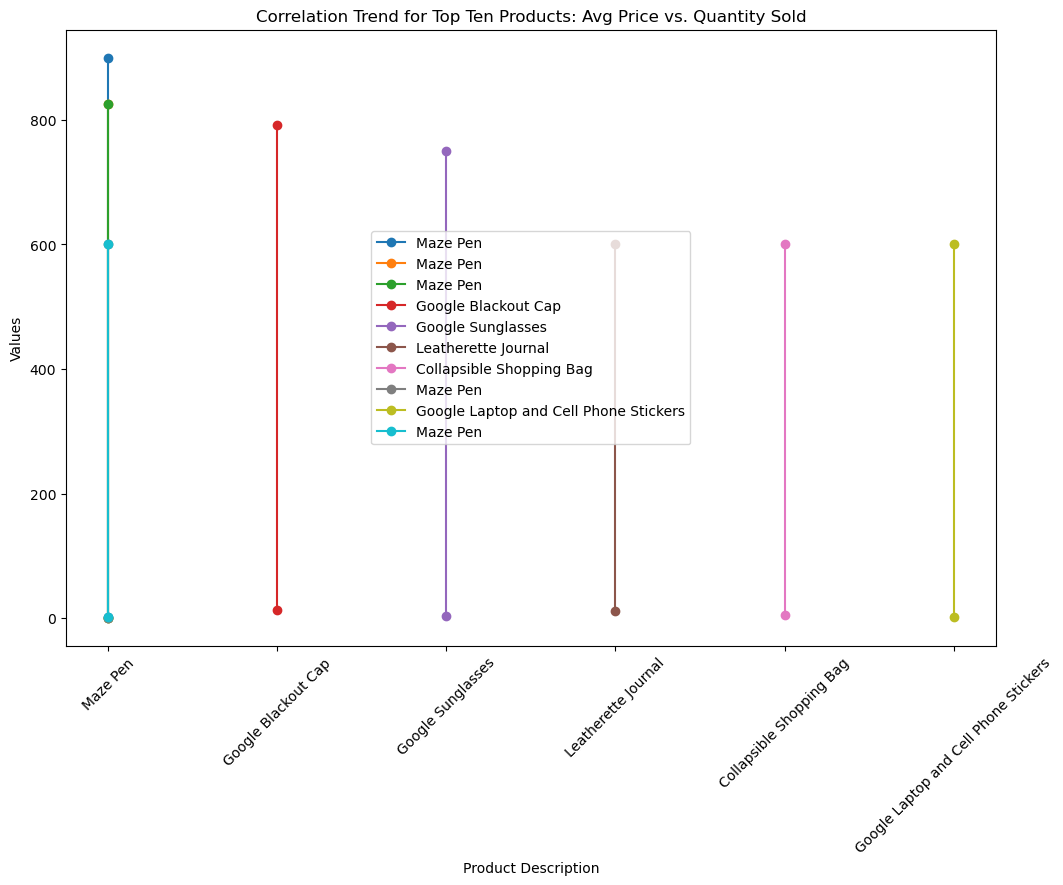

In [72]:
# Sort the DataFrame by Quantity and select the top ten products
top_ten_products = df.sort_values(by='Quantity', ascending=False).head(10)

# Line plot to show the correlation trend for the top ten products
plt.figure(figsize=(12, 8))
for index, row in top_ten_products.iterrows():
    plt.plot([row['Product_Description']] * 2, [row['Avg_Price'], row['Quantity']], marker='o', label=row['Product_Description'])

plt.title('Correlation Trend for Top Ten Products: Avg Price vs. Quantity Sold')
plt.xlabel('Product Description')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## The correlation between the average price of the product and quantity sold is not much, just with 0.25% as the MAZE PEN is the most product sold.  

## 3:Are there certain product categories that are more popular than others?

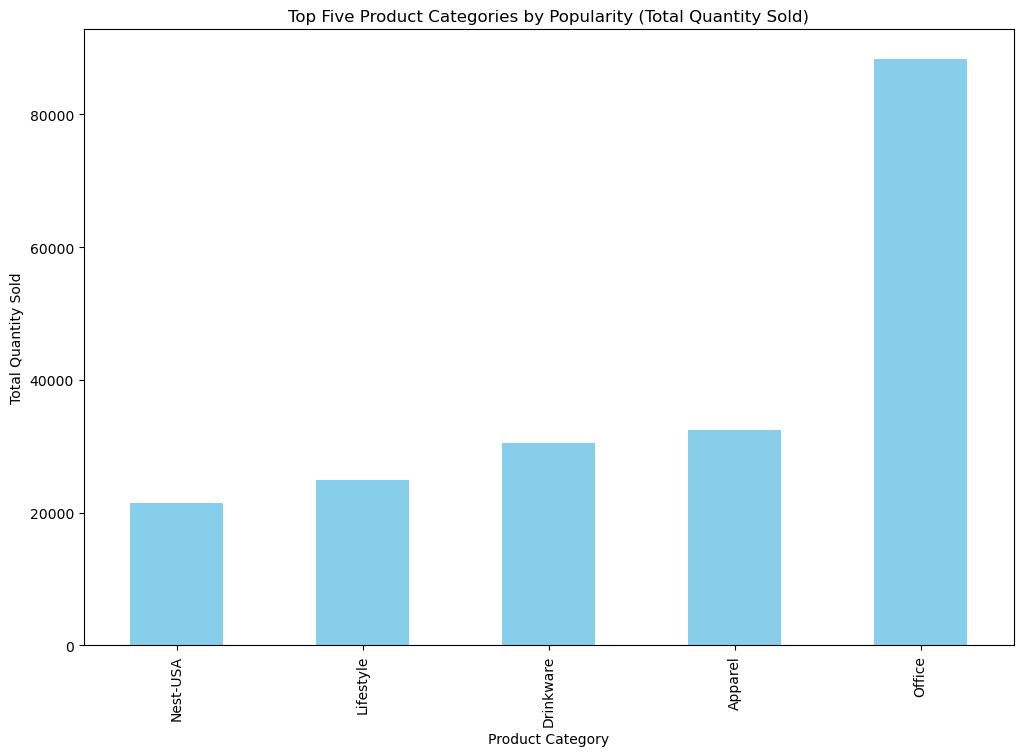

In [73]:
# Group by product category and calculate the total quantity sold
total_quantity_by_category = df.groupby('Product_Category')['Quantity'].sum().nlargest(5)

# Create a clustered column chart for the top five product categories by popularity
plt.figure(figsize=(12, 8))
total_quantity_by_category.sort_values().plot(kind='bar', color='skyblue')
plt.title('Top Five Product Categories by Popularity (Total Quantity Sold)')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.show()

## Yes, Office product is more popular than the other product.

## 4: How does the average price per product vary across different product categories?

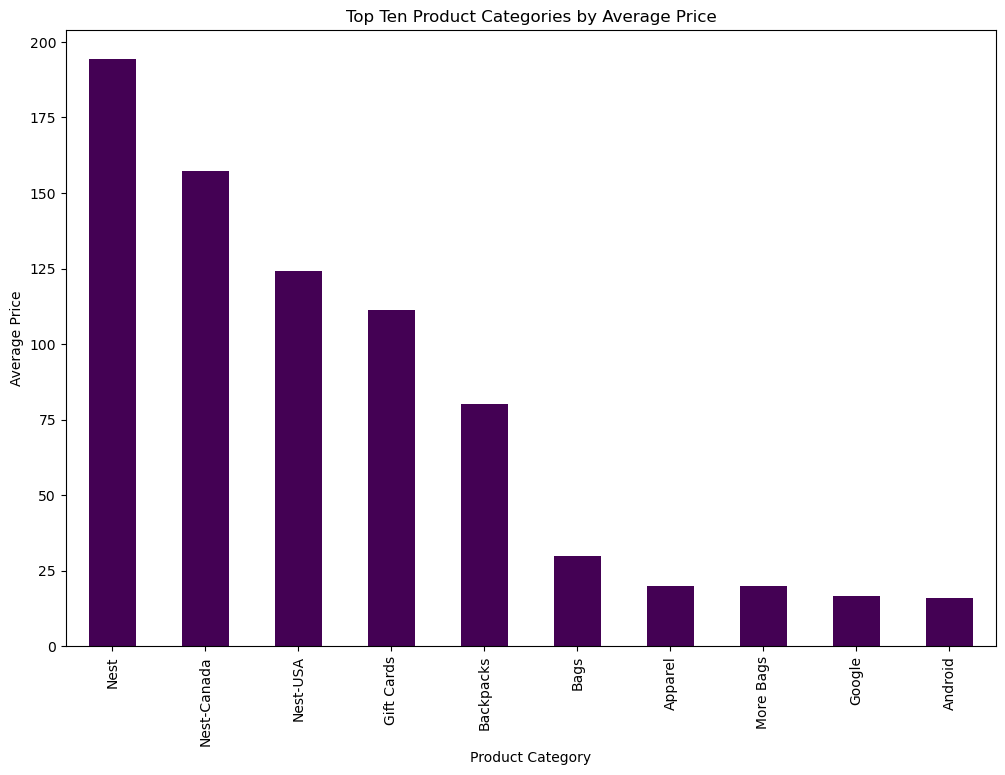

In [74]:
# Group by product category and calculate the average price
avg_price_by_category = df.groupby('Product_Category')['Avg_Price'].mean().nlargest(10)

# Create a stacked bar chart for the top ten product categories
plt.figure(figsize=(12, 8))
avg_price_by_category.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Top Ten Product Categories by Average Price')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.show()

## The average price per product vary across different product categories which makes NEST to have the highest average price.

# Transaction Patterns

## 1: How does the transaction volume vary over time (monthly)?

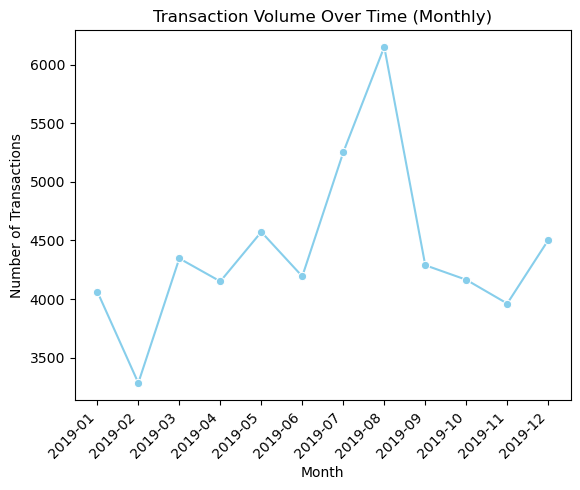

In [75]:
# Convert 'Transaction_Date' to datetime format
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

# Extract the month from the 'Transaction_Date' column
df['Month'] = df['Transaction_Date'].dt.to_period('M')

# Count the number of transactions for each month
monthly_transaction_count = df.groupby('Month').size()

# Using seaborn for a line plot
sns.lineplot(x=monthly_transaction_count.index.astype(str), y=monthly_transaction_count.values, marker='o', color='skyblue')

plt.title('Transaction Volume Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

## The highest transactions was made in the month of AUGUST (2019-08)

## 2: Are there specific months or seasons with higher sales?

In [76]:
# Convert 'Transaction_Date' to datetime format
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

# Extract the month from the 'Transaction_Date' column
df['Month'] = df['Transaction_Date'].dt.to_period('M')

# Calculate total sales for each month
monthly_total_sales = df.groupby('Month')['Online_Spend'].sum()

# Find the top N months with the highest total sales
top_n_months = monthly_total_sales.nlargest(5)  # Adjust 5 to your desired number

print("Top Months with Highest Sales:")
print(top_n_months)

Top Months with Highest Sales:
Month
2019-08    11551233.77
2019-12    11244402.01
2019-07     9055934.41
2019-11     8934799.69
2019-04     8196922.13
Freq: M, Name: Online_Spend, dtype: float64


## 3: What is the distribution of tenure months for customers?

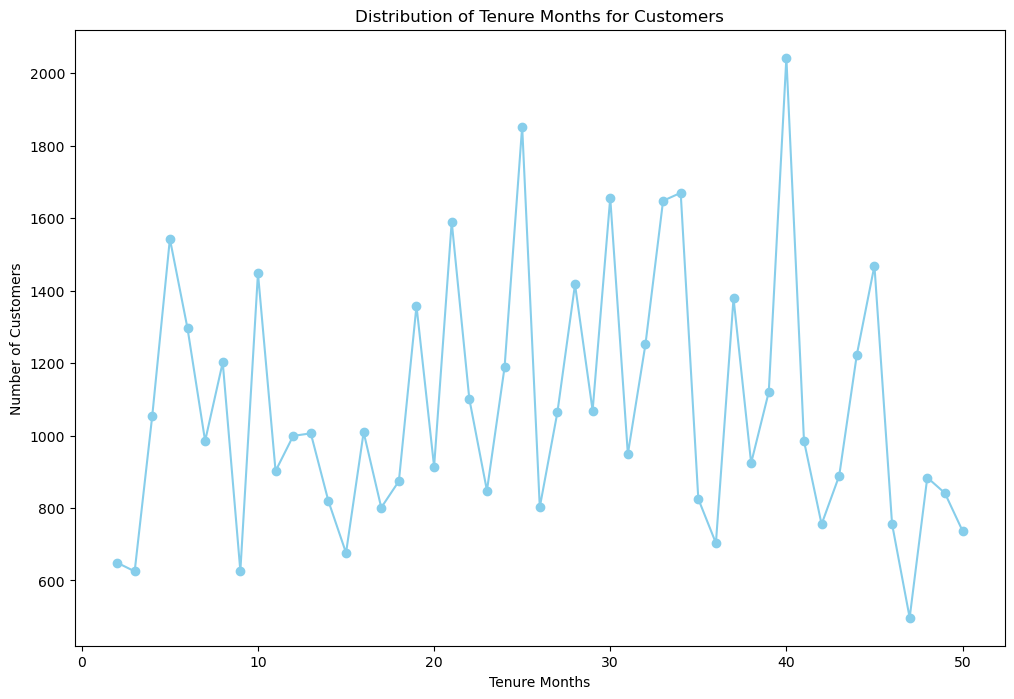

In [77]:
# Create a line chart for the distribution of tenure months
plt.figure(figsize=(12, 8))
df['Tenure_Months'].value_counts().sort_index().plot(kind='line', marker='o', color='skyblue')
plt.title('Distribution of Tenure Months for Customers')
plt.xlabel('Tenure Months')
plt.ylabel('Number of Customers')
plt.show()

## The 40th tenure has more distribution than the other tenure.

## 4: How many transactions involve coupon usage?

In [78]:
# Count the number of transactions with coupon usage
coupon_usage_count = df[df['Coupon_Status'] != 'Not Used']['Transaction_ID'].nunique()

print(f"The number of transactions involving coupon usage: {coupon_usage_count}")

The number of transactions involving coupon usage: 22707


### In conclusion, the analysis of online shopping data provides valuable insights into consumer behavior, operational efficiency, and the overall performance of e-commerce businesses. This transformative mode of retail has not only changed the way people shop but also necessitated a deeper understanding of the dynamics that drive success in the online marketplace.